In [2]:
!unzip Images.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!unzip Airplanes_Annotations.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user01\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user01\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [7]:
path = "Images"
annot = "Airplanes_Annotations"

42845.jpg
                 4
0      15 69 40 96
1    10 173 42 203
2   74 212 100 243
3  233 197 256 226


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\3283909786.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\3283909786.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\3283909786.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

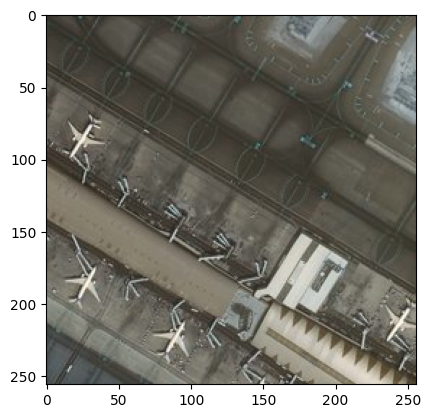

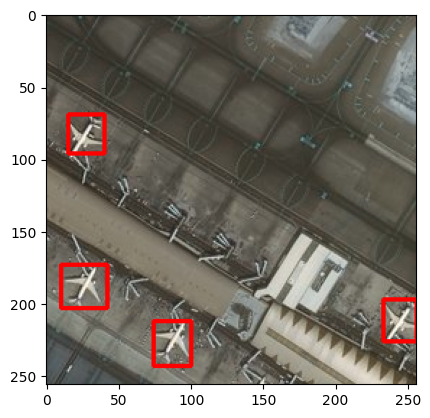

In [8]:
# The os.listdir() function returns a list of all the files and directories in the specified directory(annot='Airplanes_Annotations' in this case).
# e: This variable stores the index of the current item in the list.
# i: This variable stores the name of the current file or directory.

# path is a string representing the directory path.
# filename is a string representing the name of the file.
# os.path.join(path,filename) will contain the full path to the file stored in variable filename within the directory specified by path
# The os.path.join() function automatically handles the differences in path separators between operating systems. For example, on Unix-like systems (Linux, macOS), it uses / as the separator, while on Windows, it uses \.

# This function is particularly useful when dealing with file paths in a platform-independent way, as it ensures that the resulting path is correctly formatted regardless of the operating system being used.

for e,i in enumerate(os.listdir(annot)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        print(df.head())
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

In [9]:
# When cv2.setUseOptimized(True) is called, it enables optimization techniques within the OpenCV library that can improve the performance of certain operations.
# These optimizations are implementation-specific and are intended to make OpenCV functions run faster.
cv2.setUseOptimized(True)

# Creates a Selective Search Segmentation object using the ximgproc module of OpenCV. 
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

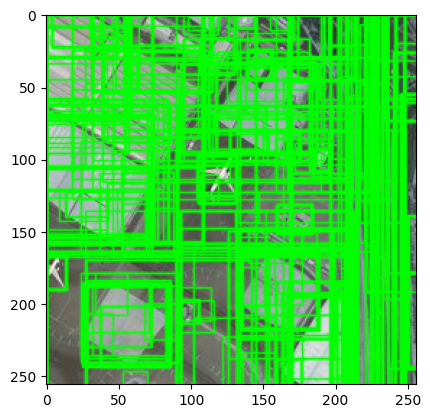

In [10]:
# Read the image file "42850.jpg" from the specified directory path into a NumPy array using the cv2.imread() function.
im = cv2.imread(os.path.join(path,"42850.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [11]:
train_images=[]
train_labels=[]

In [12]:
# The function starts with assertions to ensure that the bounding boxes are correctly formatted and valid. 
# Specifically, it checks that the coordinates of each bounding box form a valid rectangle, with x1 < x2 and y1 < y2.

# Next, the function calculates the intersection area between the two bounding boxes. 
# It finds the coordinates of the intersection rectangle by taking the maximum of the left and top coordinates and the minimum 
# of the right and bottom coordinates. If there is no intersection (i.e., the intersection rectangle is not valid), the function returns an IoU of 0.0.

# Then, the function calculates the areas of the bounding boxes bb1 and bb2 using the formula: (x2 - x1) * (y2 - y1).

# Using the intersection area and the areas of the bounding boxes, the function calculates the IoU metric using 
# the formula: IoU = intersection_area / (bb1_area + bb2_area - intersection_area).

# Finally, the function asserts that the calculated IoU is within the valid range of [0, 1] and returns the result.

# This function is commonly used in object detection tasks to evaluate the accuracy of bounding box predictions by 
# measuring the overlap between the predicted and ground truth bounding boxes. The IoU metric ranges from 0 (no overlap) to 1 (perfect overlap).

def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [13]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [14]:
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            # print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            print(df)
            gtvalues=[]
            for row in df.iterrows():                
                x1 = int(row[1][0].split(" ")[0])                                
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

               3
0  173 15 232 70
1  49 76 139 153
2   4 164 93 244


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                6
0   123 18 151 49
1   162 25 187 48
2    20 83 35 112
3    44 87 73 115
4   83 86 110 116
5  112 90 141 123


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              1
0  2 60 150 149


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0      59 9 111 55
1    112 38 159 88
2   142 75 199 124
3  206 105 256 157


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 4
0     3 105 67 150
1    170 35 229 73
2  139 172 196 214
3  223 137 254 173


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 8
0      77 2 106 23
1     91 16 126 47
2    101 52 147 86
3  187 154 226 196
4  202 220 223 234
5  191 235 219 255
6  240 232 255 250
7  163 241 181 254


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0    56 13 180 125
1  171 138 219 190
2  192 194 250 252


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
             1
0  56 55 98 96


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0       8 25 67 76
1    32 119 67 147
2    33 163 95 213
3  199 143 233 175


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   18 183 57 220
1  70 218 125 254


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0  119 145 152 178
1   140 87 159 108
2    162 57 192 88
3    191 58 227 91
4    59 174 89 201


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0    29 12 123 98
1  82 137 186 227


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 2
0    129 62 158 94
1  109 158 144 192


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  37 167 85 204


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  101 117 147 154


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    128 22 166 57
1  199 103 237 137


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   45 86 106 153
1  133 64 193 125


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  79 77 144 150


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0     2 99 41 147
1       4 4 34 20
2    97 29 144 72
3  81 220 129 252


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                10
0    39 141 66 165
1  120 125 154 165
2  158 130 171 155
3  173 129 196 159
4  197 137 216 156
5  221 146 243 164
6  148 229 189 254
7  209 243 242 254
8    33 168 56 184
9    17 190 38 213


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  35 107 93 150
1  23 165 81 214


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  126 174 168 209
1      54 3 101 27


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  111 122 153 159
1     87 44 111 69


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0   123 52 155 88
1   68 63 109 111
2    20 72 62 107
3  76 181 118 235


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  2 122 115 212


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              2
0  10 89 51 123
1   37 31 74 63


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0      60 14 97 67
1  140 164 171 191


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             1
0  63 5 176 93


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  107 81 161 136


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0     68 44 116 66
1    120 34 163 60
2    171 23 218 53
3   76 195 129 226
4  133 183 187 215


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0     67 10 157 99
1  120 158 199 247


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  165 57 218 111


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0   93 43 132 90
1  190 32 235 72


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  166 84 253 186


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  105 54 190 155


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  175 72 228 120


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             1
0  4 6 115 107


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  86 67 151 143


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  42 44 215 166


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              2
0   36 45 80 74
1  43 79 81 118


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0     1 92 71 177
1   84 74 158 162
2  184 61 253 142


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 3
0  145 106 182 144
1   170 82 215 118
2      5 80 38 119


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0    109 29 130 56
1    108 69 129 97
2  104 110 126 138
3   97 150 118 176


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0       57 2 95 31
1     59 46 104 85
2   69 105 109 146
3   73 166 117 209
4  157 164 195 200
5  165 232 209 255


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0     51 17 137 84
1   137 66 206 124
2  106 137 147 166
3   81 174 116 205
4    39 204 83 248


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               2
0   70 30 114 72
1  144 35 187 73


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  47 72 179 173


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  37 151 105 220
1  108 36 176 107


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  73 54 170 142


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0     74 6 170 77
1   38 95 142 174
2  92 169 198 254


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 7
0    149 31 167 49
1    154 50 175 74
2    169 75 188 93
3     85 53 110 74
4  127 129 154 160
5  154 149 181 179
6  181 134 207 156


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              2
0  106 4 135 38
1   25 52 67 89


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0    142 4 208 40
1  119 64 187 116
2  87 119 154 178
3  53 187 124 246


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                2
0    102 5 192 80
1  79 105 166 182


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0      76 6 127 64
1   142 63 177 104
2  101 205 133 249


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0     35 88 68 113
1  116 103 149 134
2  130 180 165 214
3  193 129 235 162
4    207 47 235 72


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0   68 112 101 141
1    40 141 65 162
2    164 18 202 53
3    140 51 162 69
4  184 202 233 240


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  96 89 185 184


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  81 60 227 180


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  57 89 142 159


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              1
0  8 47 142 174


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  85 104 201 181


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               1
0  63 122 95 150


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  90 67 189 157


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0      9 56 59 109
1    128 17 204 84
2    29 137 82 192
3   82 189 125 245
4  150 120 199 173


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   40 62 118 148
1  127 67 210 148


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0   191 90 229 124
1  212 125 252 171
2   73 176 103 208


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0    142 41 160 61
1    200 22 222 45
2  165 106 187 123
3  217 156 241 177


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  36 135 78 177
1  190 63 233 95


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  63 139 153 210
1   88 27 191 109


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   178 37 209 64
1  184 75 240 118


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    87 33 183 108
1  114 187 175 247


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  65 51 224 185


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0    65 12 147 113
1   135 66 217 144
2  168 134 253 219


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 7
0     77 14 127 68
1  183 132 234 190
2  218 195 251 231
3     3 114 43 166
4    39 162 89 215
5     4 202 19 234
6    15 222 58 254


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                1
0  101 79 217 181


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0    57 64 97 105
1      33 4 83 51
2   105 63 140 99
3  164 94 205 126


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               3
0     8 33 53 66
1    21 67 62 96
2  33 102 72 135


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0     6 71 67 164
1  161 45 251 116


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  68 132 174 244


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   60 46 125 144
1  148 83 210 147


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    64 56 122 125
1  122 129 191 204


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0  46 112 112 175
1  95 180 141 235
2  130 67 208 151


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 2
0   171 51 239 116
1  184 109 253 184


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0      18 16 70 69
1    60 84 116 143
2  123 143 192 222


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               1
0  76 78 166 179


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  71 74 185 181


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              1
0  80 40 122 79


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             1
0  84 5 122 34


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0    41 103 99 150
1   186 61 254 107
2  181 111 231 149


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0     14 83 36 103
1    36 139 54 161
2  228 117 252 151


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0     98 7 185 105
1  117 125 189 222


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0    21 94 67 152
1   176 39 225 87
2  156 96 224 152


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  157 160 190 197


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  46 87 180 221


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0     3 71 91 143
1     56 5 151 80
2  145 78 254 173


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 3
0       6 16 77 79
1   178 41 237 101
2  189 177 251 235


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               1
0  90 62 188 143


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             1
0  18 24 57 60


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    101 42 148 83
1  130 135 175 185


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   76 48 150 124
1  64 137 140 213


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                6
0    80 29 133 67
1   140 36 191 74
2   203 31 253 70
3   71 98 118 138
4  70 152 117 196
5  192 74 253 126


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0      39 4 94 46
1     99 7 149 59
2  178 68 238 122


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 13
0    194 80 240 117
1     138 77 166 94
2    131 93 154 110
3   125 111 151 129
4   116 130 136 153
5   151 110 177 146
6   211 174 237 199
7   163 178 189 198
8   188 113 230 145
9   221 134 243 149
10  193 151 222 178
11  171 153 199 182
12  220 104 249 131


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  139 85 178 118


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               8
0    29 18 65 55
1    71 29 93 55
2   95 33 116 60
3  117 33 146 60
4  146 34 171 61
5  173 28 201 57
6  197 28 222 55
7  219 16 243 45


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 12
0   207 111 247 140
1   160 157 190 181
2   152 185 183 208
3   177 174 212 205
4   204 207 236 233
5   202 231 239 251
6   241 223 256 241
7   202 141 225 172
8   188 127 207 152
9   215 184 231 199
10  175 176 214 205
11  219 133 242 160


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  113 56 185 134
1    21 89 96 168


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                3
0    82 45 135 95
1     36 41 64 64
2  158 80 191 114


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0       3 19 58 71
1  187 175 250 239


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0   11 63 64 108
1  96 92 195 203


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 8
0      17 31 83 95
1    103 16 153 61
2   104 66 153 110
3  110 120 160 163
4    18 117 86 178
5  113 169 162 214
6    27 215 47 238
7    33 237 58 257


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 2
0       4 36 25 65
1  224 133 250 164


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  52 104 169 200


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  151 50 212 116
1  47 109 115 186


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  112 97 188 176


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0      7 68 36 108
1      57 12 92 48
2    100 30 138 71
3   193 86 230 119
4  218 129 252 163


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  58 57 179 191


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0   86 95 190 194
1  187 55 249 108
2      4 42 35 76
3   234 14 256 52


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 3
0    79 31 137 101
1   38 133 103 188
2  142 135 211 189


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                2
0     6 35 88 123
1  170 97 250 185


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 2
0    29 94 111 186
1  157 162 208 224


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    61 69 131 145
1  151 105 229 189


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               2
0  14 138 72 193
1  187 36 245 83


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0     110 1 165 19
1    145 20 189 49
2   162 62 205 100
3   203 99 249 142
4  201 161 250 202


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 8
0      96 6 126 31
1      38 40 82 84
2     56 89 90 119
3   65 129 111 168
4  133 126 175 170
5   77 172 121 211
6  152 182 184 211
7   98 218 133 248


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 2
0       3 47 42 82
1  211 154 249 198


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0      29 25 98 77
1    69 84 145 145
2  118 155 193 225


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               5
0   25 80 45 102
1     42 4 67 29
2   78 23 102 55
3  114 59 137 84
4  182 68 214 96


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0     60 33 88 64
1  75 169 111 204


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0      39 23 98 70
1    84 93 141 141
2  135 159 192 212


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0    59 163 99 205
1    100 78 117 97
2    115 61 133 81
3  223 104 256 157
4     219 3 255 19


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0  134 170 170 210
1  172 161 208 206
2  162 198 191 226


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0    71 88 105 119
1     97 63 134 91
2    129 39 145 59
3  143 198 179 229


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0  71 101 118 141
1   52 152 97 191
2   161 25 232 84
3  156 97 222 144


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  55 127 149 219
1   101 14 198 99


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                2
0   29 62 132 167
1  152 74 245 160


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 12
0        28 6 41 23
1       46 16 59 27
2      37 88 63 113
3   101 105 139 133
4     52 138 74 154
5     37 161 52 174
6    84 149 113 168
7     21 198 44 217
8     49 217 70 239
9       2 80 18 105
10        8 6 24 23
11    30 110 43 122


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  176 48 248 106
1   18 132 81 189


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                10
0     118 7 145 34
1      41 30 66 45
2      50 49 75 73
3    76 117 97 137
4   83 140 104 160
5   98 187 125 209
6    132 39 160 71
7  157 116 187 144
8  176 151 204 184
9  189 189 222 221


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               4
0  132 46 171 86
1   43 92 87 128
2  49 156 84 192
3   5 190 35 233


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  70 69 177 180


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  69 80 177 179


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              2
0  17 95 94 142
1  67 29 147 89


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0  62 112 124 171
1  132 99 200 156
2   171 41 236 97


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0    114 24 151 68
1  119 101 153 134
2  197 102 237 146


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  23 190 56 218
1  60 189 91 222


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  19 85 132 170


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             1
0  27 27 75 71


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  41 125 131 221
1  115 21 206 109


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   41 79 119 168
1  141 76 215 166


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 2
0    72 37 149 113
1  120 115 229 203


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  108 52 205 151


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  110 161 164 210


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  103 182 153 220
1     86 49 111 68


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              1
0  69 53 118 99


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  68 113 93 137
1  31 153 60 177


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0    20 135 74 180
1     93 54 136 96
2   159 55 203 101
3  174 117 225 163
4  161 177 214 222
5    30 192 93 245


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0     95 23 128 50
1  134 163 168 189


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0  121 121 160 156
1     47 75 98 116
2      2 65 25 101
3     2 175 39 214


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  105 41 203 121
1  90 165 133 208


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               3
0     4 21 54 84
1  177 26 192 41
2  211 33 229 53


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  187 145 221 186


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  38 37 110 117


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  58 178 119 243
1  210 83 244 117


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  103 57 184 147
1  84 159 144 218


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0   124 47 206 115
1  143 127 223 200


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 7
0    15 112 46 138
1    70 127 97 154
2  207 102 237 118
3  182 158 207 189
4  128 143 155 174
5      32 43 64 67
6       2 33 23 50


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 9
0     66 59 109 83
1  113 119 155 144
2   85 147 134 178
3  134 148 185 172
4  113 172 170 204
5   94 205 150 236
6     86 17 135 50
7    123 31 171 52
8    104 50 145 75


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 24
0       46 32 65 48
1      96 30 115 42
2     119 27 135 37
3       38 75 55 87
4       54 72 70 85
5      93 69 113 81
6     131 64 148 77
7     47 113 63 126
8     67 113 82 125
9    84 112 103 126
10  103 111 122 122
11    43 151 64 170
12       37 3 55 12
13    82 151 99 165
14  104 152 114 164
15  115 151 137 162
16  138 149 150 158
17  152 142 171 159
18  147 191 166 201
19  164 187 177 199
20    49 199 67 215
21  140 245 159 256
22    115 67 128 78
23      74 71 91 81


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  56 89 143 191


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  94 17 206 112


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0    16 70 52 101
1   44 152 68 183
2  149 68 194 120
3   232 55 255 86


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  69 128 159 204
1  152 37 219 131


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  88 49 172 166


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    126 73 162 95
1  129 109 165 133


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  50 87 147 179


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0  121 129 172 169
1     182 3 213 28
2     5 123 55 184


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    42 42 130 128
1  113 127 200 209


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  114 56 157 95
1   3 153 25 176


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  98 55 211 153


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              2
0    2 16 31 50
1  222 4 253 36


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 9
0      61 17 99 54
1      64 71 99 99
2    32 102 70 130
3     3 135 48 169
4    201 64 232 90
5  174 100 213 126
6  141 138 181 169
7  108 174 147 202
8  189 223 238 254


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0      27 22 70 53
1  192 191 242 229


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  34 83 106 148


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0     98 74 122 96
1     131 3 162 28
2    56 157 76 180
3  150 223 189 254
4  182 165 211 191


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0    92 30 188 97
1  74 129 158 187


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  172 212 230 253


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 7
0        2 3 26 31
1  186 171 238 228
2    17 134 67 180
3    58 153 95 196
4    40 191 84 220
5     4 160 65 209
6  165 217 175 230


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                5
0  86 109 144 156
1  68 156 127 199
2     80 6 175 68
3     28 57 84 97
4    5 100 47 139


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                1
0  148 13 256 115


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0     54 44 100 95
1  154 115 182 148
2  192 139 224 172


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0  123 204 148 233
1  153 191 171 217
2  179 180 200 199
3  211 169 232 188
4    66 233 91 255


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  69 72 159 182


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   58 93 136 171
1  164 63 235 148


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  50 109 128 203
1  137 88 217 171


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  110 97 250 229


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              1
0  112 3 237 95


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0      74 9 138 70
1      13 17 69 78
2  154 155 215 240
3  211 126 255 187


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 2
0   126 28 196 111
1  117 149 188 221


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 26
0       22 78 31 90
1       29 69 48 81
2       44 65 59 76
3       58 57 68 70
4     122 16 138 26
5      134 9 146 21
6      93 35 102 46
7       79 41 93 56
8       69 48 79 59
9     27 110 39 121
10    38 102 48 111
11     48 97 62 105
12      61 89 76 97
13      73 82 86 91
14      87 75 96 84
15    106 69 118 79
16    118 53 133 65
17    133 47 145 58
18    144 39 154 48
19  116 238 127 253
20  126 232 143 248
21  136 225 152 241
22  154 216 164 226
23  165 209 179 219
24  166 220 174 230
25  152 229 165 237


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  65 113 216 236


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              1
0  71 8 190 117


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  69 86 190 186


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    92 58 152 117
1  112 142 179 215


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             1
0  70 3 103 26


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0     41 51 77 91
1   87 72 131 118
2  138 97 190 142


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0    65 78 105 133
1     7 101 45 144
2  181 241 198 254


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             1
0  4 7 248 250


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0    13 167 31 190
1    36 173 59 199
2    65 178 87 201
3  122 192 140 216
4  214 214 245 247


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0  108 97 151 140
1  173 63 217 120
2   41 204 96 246


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0  132 140 154 155
1  156 191 172 209
2    196 17 242 56


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0  79 195 148 249
1       3 6 66 56
2   209 12 257 69


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 7
0      54 28 88 78
1     43 81 86 132
2    37 136 77 169
3    39 177 77 216
4  160 112 224 171
5   167 61 221 107
6  148 183 217 244


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               1
0  42 38 173 179


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0     36 80 60 110
1     86 71 116 97
2   128 74 160 101
3  145 106 184 141
4   201 87 246 137
5  155 157 192 183


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   118 12 201 86
1  68 118 160 201


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  22 40 187 199


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0     71 4 118 55
1   76 61 121 111
2  82 122 132 176
3  92 183 134 246


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0    186 25 228 69
1   164 71 209 110
2  140 119 187 165
3  111 170 157 211
4   60 219 128 257


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  182 143 249 195
1    40 59 102 102


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0   140 52 230 106
1  120 113 212 172


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 7
0     105 5 164 46
1    103 40 148 73
2   102 78 164 137
3   177 94 219 128
4  160 137 221 172
5  113 141 136 170
6   13 171 101 245


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 2
0      92 7 145 46
1  201 146 230 180


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0    73 61 134 128
1     144 7 192 71
2    13 123 63 187
3  186 129 253 221


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
              1
0  32 33 80 101


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  99 56 243 163


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              1
0  6 23 109 108


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              3
0   11 17 38 47
1   60 12 88 50
2  109 8 136 38


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  133 79 228 148


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  86 115 157 192
1    5 105 63 197


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   35 94 124 181
1  158 31 252 131


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 16
0       55 67 74 85
1    94 147 116 164
2     69 189 90 210
3    165 83 181 106
4   196 115 218 133
5   172 165 197 180
6      82 35 100 56
7     103 42 119 58
8     121 50 136 66
9     138 44 152 62
10    159 50 173 65
11    162 63 182 78
12    196 66 215 79
13    214 71 231 82
14    197 79 217 91
15    225 85 242 98


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0     4 85 82 148
1  187 54 256 123


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              1
0  98 3 248 113


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               3
0    59 19 97 61
1    15 58 60 90
2  203 12 228 40


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             1
0  45 15 96 51


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  94 57 180 126


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               10
0     60 11 91 58
1    87 15 116 60
2    97 30 134 72
3   115 48 158 87
4   153 28 183 59
5   184 26 214 54
6   188 48 221 86
7   155 62 189 97
8  141 99 174 143
9  178 82 209 130


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 7
0    125 34 160 65
1     94 59 140 98
2     51 69 96 105
3    61 107 93 138
4  108 123 148 167
5  155 134 190 178
6  169 168 237 237


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               3
0    62 69 84 90
1   92 55 118 86
2  169 66 203 92


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  70 96 171 173


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              2
0  70 26 113 62
1    4 33 34 66


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               3
0   30 74 76 106
1  94 87 126 114
2   3 162 21 195


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  82 69 213 182


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              4
0   12 42 64 78
1   2 74 39 108
2  3 216 24 247
3    30 1 49 22


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0   143 75 186 118
1  179 171 216 212
2       4 56 30 78
3     54 89 77 115


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  99 102 146 140


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0  138 153 173 183
1   206 85 247 120
2     11 69 43 108


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0     78 35 112 64
1    116 77 133 96
2  137 108 155 128
3  169 193 196 208


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  78 87 180 188


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0    59 94 117 147
1   89 150 129 186
2  122 199 172 238
3    212 75 228 99
4      35 55 82 94
5       6 16 54 61


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               4
0     8 32 32 66
1  116 23 149 59
2  160 12 188 47
3   192 6 248 66


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               3
0   79 34 109 70
1  144 34 162 58
2  202 16 225 47


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0      68 73 94 94
1    217 48 248 78
2  152 168 178 194
3  187 162 214 186
4    52 178 73 202


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0    35 109 80 151
1   74 153 121 195
2  175 206 204 229
3    10 163 44 191
4      27 44 85 75


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  64 122 186 223
1     54 4 155 93


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  46 96 138 173


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0   104 33 174 117
1  105 156 185 236


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0     59 89 90 123
1    144 13 179 46
2    37 122 59 144
3  134 207 175 243
4  191 151 225 179
5  216 122 253 148


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    33 194 66 235
1  129 130 143 142


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

            1
0  5 51 47 90


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0    75 67 118 100
1    151 16 168 42
2     179 4 203 25
3  117 186 167 219
4   74 216 123 253
5     4 145 30 174


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0  68 128 128 175
1  141 83 185 117
2   186 39 242 84
3    4 186 43 217


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                2
0  97 172 160 226
1   124 42 170 81


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    59 32 132 119
1  138 101 213 185


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0   62 143 108 180
1   140 73 167 100
2  144 108 192 147
3      18 36 45 55


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0      38 14 54 35
1   120 73 150 103
2   84 104 121 122
3  168 170 210 206
4  139 224 162 254


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0      46 45 80 85
1  175 111 209 146


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   20 81 110 180
1  140 99 214 193


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0    78 55 135 97
1   174 22 240 80
2  95 154 175 208


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               3
0  132 12 156 40
1  159 46 189 76
2      9 3 33 18


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                6
0   142 23 184 62
1  114 80 156 113
2  79 102 123 141
3  92 143 146 188
4  58 187 102 229
5  75 233 120 254


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0    25 119 76 166
1    129 22 146 39
2    129 43 153 60
3    134 68 157 83
4  130 133 142 145
5   236 83 254 121


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  71 150 120 194
1     35 28 66 45


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0  99 101 181 154
1    144 3 210 42
2  63 181 146 246


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 2
0      86 9 166 65
1  162 173 252 251


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   11 117 73 187
1  187 60 253 139


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  61 72 138 179


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  108 82 208 184


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  111 69 174 132


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  135 189 184 230
1  191 166 240 205


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0   38 109 100 154
1     162 5 209 35
2     8 204 59 236
3  193 241 232 256


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               3
0  32 138 60 175
1   65 90 85 127
2    98 6 126 34


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  100 102 201 186


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    53 72 115 127
1  111 126 176 189


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0    5 119 77 234
1  155 59 233 177


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              2
0  102 8 140 51
1  171 4 204 42


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   47 19 129 136
1  167 69 252 181


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 4
0    16 109 42 128
1    48 117 63 134
2  180 159 208 182
3  216 100 240 129


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                5
0     7 58 53 103
1   66 68 106 122
2  118 90 162 137
3   214 50 245 82
4  193 99 252 135


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 5
0   77 102 128 146
1    152 22 196 59
2  147 114 190 166
3  199 106 240 155
4    31 158 71 197


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0     4 158 29 192
1    49 139 88 179
2  114 125 143 165
3  165 112 205 153


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   35 205 75 237
1  74 193 111 226


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0   10 208 49 244
1   42 164 81 199
2  82 128 116 169
3  163 72 193 110


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0      5 89 93 193
1  161 114 253 218


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    96 41 187 111
1  101 145 191 233


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               1
0  11 196 73 247


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   37 110 89 154
1  52 171 101 224


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0    42 100 69 126
1     72 58 103 87
2    105 24 134 43
3  178 145 203 167
4  148 181 179 204


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0     55 13 102 65
1    177 23 235 73
2  170 113 226 165
3   38 187 102 255


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               1
0  45 51 138 137


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  97 82 188 189


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0      14 5 87 70
1   96 45 145 113
2  173 72 253 176


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   44 63 140 172
1  159 72 248 180


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                3
0  49 156 134 226
1   93 85 160 156
2  184 63 253 136


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 7
0    42 142 76 175
1   96 146 131 179
2  144 155 167 184
3  169 158 192 185
4  194 159 219 185
5    141 11 172 48
6    174 36 204 76


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0  114 72 173 142
1   166 27 228 99
2    5 151 67 226


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0    135 7 202 94
1   47 85 136 154
2  95 174 186 248


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             3
0  93 4 129 35
1  40 45 56 61
2   2 65 20 91


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0    135 11 179 40
1   134 76 190 111
2  139 145 194 176
3  150 207 208 250


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0  60 119 123 185
1  129 99 200 173
2  174 52 257 122
3    1 167 55 234


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0      38 4 171 98
1  145 183 215 247


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0      38 62 64 95
1   102 86 130 117
2  162 109 183 137
3  220 120 251 153


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0   64 153 124 197
1  144 119 194 158
2     97 34 156 75


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 4
0     79 31 119 67
1   226 99 253 125
2  107 164 145 202
3      4 89 41 120


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    30 33 137 120
1  125 118 229 218


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  58 193 84 214
1   5 172 36 210


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                10
0  104 129 125 152
1    103 41 123 61
2   190 68 230 106
3   158 98 177 120
4  154 116 175 135
5  150 145 171 166
6  204 138 234 166
7  199 165 235 191
8      84 45 96 58
9    152 71 162 85


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  118 22 244 125


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0   157 83 186 110
1  201 102 244 132
2  117 179 147 209
3  184 193 219 231


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  86 117 127 154
1  153 84 180 119


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  77 68 168 168


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0  91 117 161 176
1   174 26 239 86
2   21 181 86 242


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0   82 179 147 241
1  154 165 196 207


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0     106 5 201 69
1    78 82 167 150
2   39 162 133 235
3  136 145 223 222
4   167 56 254 125


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               1
0  92 32 191 128


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0      19 40 73 99
1     76 25 129 73
2     148 2 200 57
3  152 162 199 214
4  210 156 245 195
5   98 195 148 238


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               1
0  82 63 177 164


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    74 22 215 150
1  163 195 230 253


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  23 131 127 225
1  208 79 253 126


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0    4 174 105 249
1      93 5 164 58
2   147 65 204 117
3  197 125 255 184


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                3
0   28 153 70 191
1  77 166 117 208
2   153 31 197 64


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0  166 179 201 209
1   97 178 110 196
2  116 176 137 195
3   98 213 144 254


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0       9 51 59 89
1     38 96 85 132
2   66 150 120 182
3  115 187 161 233


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  80 72 184 171


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               4
0     4 26 41 63
1    13 65 60 97
2  24 108 62 141
3  29 207 65 239


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0    133 0 204 66
1  114 79 190 150
2  60 129 143 204
3  38 185 118 255


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                2
0   46 117 87 163
1  86 108 112 143


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  76 33 230 172


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0  148 154 195 195
1  121 195 151 227
2  161 187 209 228


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               3
0   18 59 78 112
1  193 10 243 60
2  17 179 34 200


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  122 153 197 247
1      79 5 147 98


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                3
0   133 14 167 49
1   164 53 200 89
2  198 92 234 133


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 8
0       23 6 57 32
1      14 40 52 69
2        1 3 19 32
3     89 32 125 60
4     49 71 88 102
5   88 152 122 185
6  121 184 162 224
7  161 222 202 255


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0  86 100 121 137
1     29 14 48 34
2      5 45 25 66


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                13
0   125 85 148 108
1   152 87 176 110
2   192 94 216 120
3    205 46 243 92
4     144 2 182 32
5     200 3 246 21
6      87 2 124 23
7    121 17 140 37
8      16 38 37 62
9       3 62 28 84
10     39 69 66 92
11   81 77 106 100
12  241 89 256 120


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                2
0  83 133 133 180
1   43 190 81 214


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              1
0  49 6 254 235


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0     93 43 118 66
1    99 81 128 103
2  104 129 128 151
3  117 170 137 188


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  113 59 148 93
1  166 11 201 48


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0    11 119 52 157
1     52 92 95 130
2    143 65 170 92
3    185 53 213 81
4  183 167 231 203
5    40 219 58 239


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  147 12 216 73
1   9 96 102 163


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0     45 44 108 99
1  151 155 223 222


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  85 60 196 176


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  176 207 210 239


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  60 73 175 153


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  65 33 176 155


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              1
0  79 13 166 67


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0   72 139 104 182
1  153 111 189 156


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                5
0    29 74 65 111
1   71 60 107 103
2  65 102 106 141
3  99 125 141 170
4  181 78 212 116


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0   90 148 156 230
1  178 142 252 221
2     5 178 48 235


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                2
0   44 98 115 179
1  136 22 213 124


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  53 55 117 125


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0      93 3 195 55
1    98 80 202 152
2  113 181 197 250
3     200 1 255 32


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0      85 7 127 36
1     80 51 127 88
2    55 133 97 167
3  195 108 230 149


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0      11 73 46 98
1     32 98 69 128
2  109 160 149 208
3    133 49 160 77


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  120 109 204 191
1     80 28 114 71


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  57 87 139 166


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  117 81 214 166
1    191 4 249 36


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0  201 143 241 179
1  188 193 216 217
2    51 201 74 225
3   96 132 116 159
4  120 108 139 128
5   136 75 164 100


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0   74 147 108 185
1  130 203 162 233
2  164 148 196 178


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0    29 92 113 177
1    178 10 234 59
2  158 130 218 176
3  153 188 212 236


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               1
0  67 69 179 158


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

Empty DataFrame
Columns: [0]
Index: []
                 2
0    25 112 73 148
1  159 104 183 133


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    79 69 180 165
1  186 165 255 234


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 4
0     18 58 63 109
1   119 66 171 110
2   85 128 149 171
3  179 138 252 242


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    31 155 90 214
1  213 112 252 149


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0     198 7 238 56
1   200 66 243 120
2  207 131 253 184


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   46 79 135 141
1  178 30 254 107


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0    101 4 159 69
1  192 44 250 109
2   17 184 77 253


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               1
0  84 59 215 165


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                3
0  80 133 111 172
1   203 43 234 84
2  222 84 256 131


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0    12 60 98 135
1  149 65 240 138


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                2
0     43 5 138 80
1  153 41 251 158


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0      29 12 73 47
1   87 153 121 191
2  169 132 215 168
3      2 85 37 118


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                5
0    15 92 78 152
1  100 62 182 139
2   198 47 254 96
3     59 8 123 62
4      3 25 56 77


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 3
0     105 5 132 32
1    145 27 176 60
2  219 131 242 159


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  126 193 175 238
1   198 92 242 129


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0  64 160 146 228
1   90 78 174 150
2    118 6 193 75


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  94 212 156 255
1    122 9 177 44


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  22 175 111 238
1      6 3 103 46


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  134 105 174 146
1     220 2 256 33


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             1
0  6 5 251 251


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0  149 168 186 203
1  183 135 215 167
2    36 109 91 143
3     3 102 29 138
4  221 106 241 126


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0     197 8 244 50
1  205 136 251 177


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              1
0  39 97 93 143


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  119 80 160 117


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    24 153 91 229
1  112 173 174 243


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0      5 90 52 132
1  199 115 245 159


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0     91 39 127 77
1    147 52 184 87
2  123 105 163 140
3  138 147 182 180


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                7
0   127 44 148 68
1      50 1 76 18
2     38 24 62 44
3     7 85 24 108
4  109 77 133 101
5  93 109 117 134
6    4 112 17 142


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0   162 90 179 111
1  200 123 227 161
2  158 181 189 218
3  115 190 141 219


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   217 29 252 74
1  188 68 220 102


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             1
0  5 78 43 113


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0     30 90 78 131
1     143 6 190 46
2  200 180 253 236


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0      75 6 136 60
1   108 70 144 110
2  119 108 155 142
3  128 145 167 188
4  151 183 184 225
5  154 229 189 253


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0    68 17 143 83
1  70 107 133 176
2  68 193 124 253
3    228 1 256 41


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               7
0  64 131 81 148
1  66 155 83 172
2  64 181 81 194
3  67 205 82 221
4  14 133 37 149
5  17 155 34 172
6  16 184 28 197


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  72 122 131 183


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  73 113 187 200
1  115 20 234 102


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0   118 99 157 137
1  168 165 195 188


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              1
0  11 68 95 136


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  109 84 194 177


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0     59 82 94 114
1    93 85 124 117
2   122 94 148 118
3  175 126 225 174


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0    148 50 186 82
1   181 83 217 123
2  215 116 250 153
3      4 65 38 102
4   60 150 105 191


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0      41 11 85 54
1     44 62 84 108
2    45 111 87 160
3    45 165 89 213
4    46 216 94 256
5  183 164 246 241


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0   105 35 174 97
1  91 115 156 170
2  182 61 257 175


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 6
0     78 41 122 81
1  142 182 183 225
2    206 33 247 71
3      3 68 41 102
4    62 177 99 221
5  240 171 256 210


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0  171 114 202 142
1    228 76 247 96
2     5 138 40 169


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0    42 203 91 247
1  124 142 153 185
2  172 135 230 200
3       29 2 67 45


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0   140 18 162 42
1    96 61 119 85
2    75 82 97 102
3  86 213 128 246


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  177 71 237 129


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  26 129 58 167
1  176 25 208 48


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  85 87 209 203


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0    6 136 104 215
1  162 142 252 224
2        5 2 84 93


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 2
0    12 150 55 189
1  193 103 240 148


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             1
0  27 10 65 60


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0    36 106 68 135
1    73 86 104 117
2    137 44 164 69
3  125 145 154 177
4  158 120 190 152


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 7
0     78 19 102 43
1    117 49 141 74
2      6 99 33 138
3    40 127 81 171
4   84 158 114 198
5  120 189 157 234
6  162 220 198 254


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0  104 151 130 178
1  132 126 161 153
2  162 101 191 126


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0     18 83 99 171
1  196 112 252 163


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  113 64 191 154
1    17 80 87 172


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               3
0  21 199 50 222
1    56 64 92 85
2    84 9 112 30


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  57 140 154 241


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0     85 26 117 48
1     92 66 124 94
2   106 98 123 114
3  101 118 129 142
4  105 145 137 174
5  112 178 139 201


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0      60 14 89 38
1     66 50 107 88
2    89 91 139 125
3  112 126 151 157
4  124 154 173 191
5  151 192 190 222


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  75 34 146 125


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  115 53 219 156


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0    111 55 137 75
1  123 112 142 131
2  129 140 144 161
3     219 5 253 48


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              2
0  95 61 117 83
1    5 11 40 47


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0    82 31 133 73
1  169 88 228 136


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  65 207 115 254
1     5 87 28 119


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  203 47 248 82
1  15 220 53 253


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               3
0   99 36 142 76
1  68 77 103 116
2  29 118 71 152


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0   101 63 172 143
1  194 130 254 199
2    26 122 90 183


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0    167 67 194 89
1      67 64 89 88
2  166 181 192 203
3    47 142 77 167
4    65 202 91 225


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0    87 69 153 129
1  162 137 191 164
2  195 189 227 218


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0  145 147 175 182
1  187 160 206 183
2  216 159 238 184
3    55 149 84 182
4    31 232 71 255


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    42 32 119 109
1  143 140 224 214


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0    13 64 81 129
1  177 11 253 112
2   17 190 79 253


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               1
0  48 52 138 137


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              2
0   3 58 41 110
1  37 87 65 114


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 8
0   164 72 205 115
1  145 115 171 138
2  119 139 141 161
3      75 8 111 42
4      55 34 76 55
5      46 65 70 84
6      5 67 37 116
7    39 209 81 247


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 27
0        42 7 57 18
1        68 6 82 14
2        82 5 91 12
3       95 3 105 12
4      109 3 115 12
5      120 4 131 10
6     113 28 137 36
7       45 34 57 45
8       53 67 66 79
9       80 65 94 78
10     96 64 123 75
11   114 91 142 106
12   85 122 120 140
13    65 132 75 142
14    27 160 42 170
15    41 157 55 168
16   62 155 131 169
17  180 136 251 153
18  126 179 136 188
19    25 187 55 201
20    58 187 68 198
21    71 182 95 195
22    51 216 69 227
23    82 215 98 225
24  112 208 138 223
25  206 170 245 183
26      67 67 79 81


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               4
0    30 21 63 48
1    25 58 68 98
2  64 148 94 175
3  66 186 99 215


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  62 80 177 181


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  57 24 159 175


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   32 114 91 172
1  118 46 231 169


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  199 169 239 209


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0  156 157 197 192
1  172 121 203 144
2    204 77 218 95
3    202 43 231 69
4     76 27 121 58
5        1 8 14 26


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             1
0  4 50 79 162


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0  211 83 246 119
1   111 18 145 42
2   10 173 50 211
3  83 211 111 240


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  200 148 232 176
1  173 193 210 231


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 11
0     34 120 58 152
1     68 113 90 143
2    99 112 127 138
3   134 111 160 129
4       21 50 48 80
5       53 43 75 64
6      88 40 110 70
7     145 26 176 56
8     179 19 205 41
9    196 83 223 114
10   165 92 189 123


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0   72 114 114 159
1  118 108 163 152
2  166 109 209 156
3     80 11 129 51
4    224 15 253 46
5    44 101 65 128


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  105 89 170 156
1    41 30 104 93


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0  106 84 183 146
1  58 174 122 224
2   19 27 112 126


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               1
0  73 74 184 159


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             3
0  43 51 64 73
1  45 13 66 35
2  76 35 96 59


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    47 89 107 142
1  147 118 218 181


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                10
0    36 116 72 149
1  134 114 159 134
2    108 70 127 90
3    112 58 133 74
4    124 51 133 65
5    123 39 142 52
6    171 48 187 64
7    166 67 181 77
8    155 77 170 89
9   151 87 170 104


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  77 60 173 179


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  20 159 67 206


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  34 74 124 152


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   12 79 111 202
1  164 60 232 146


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                10
0    36 136 59 154
1     77 67 106 87
2    91 87 118 107
3   95 108 121 127
4   85 124 102 148
5    71 148 94 170
6    45 116 72 137
7     47 90 72 108
8    200 19 233 38
9  203 166 253 211


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0    81 82 117 120
1   89 130 158 199
2  110 212 158 251
3  241 154 257 182


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    16 127 78 203
1  186 177 244 245


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  155 77 255 181


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  148 148 201 195


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  46 122 138 240
1  179 83 236 156


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0     74 49 135 98
1  158 137 192 175
2  227 193 255 228
3    26 133 65 163
4   73 131 107 167


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               3
0    38 38 95 80
1   194 4 227 25
2  214 25 245 51


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 7
0     14 95 46 127
1      89 2 122 13
2    145 33 177 62
3   198 91 230 127
4   120 90 156 123
5  115 137 146 170
6   73 163 116 208


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0  113 150 165 196
1  168 147 213 173
2  213 132 256 172
3    21 106 84 152
4       5 50 59 97


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                4
0     96 5 156 51
1   89 70 169 139
2  85 149 150 205
3  81 218 143 255


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   25 33 125 129
1  149 56 246 158


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  61 125 124 206
1  165 71 211 141


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0   149 80 213 129
1  162 185 225 239


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0     23 91 85 144
1      42 9 107 66
2   173 82 240 131
3  153 163 210 222


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  52 36 136 147


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  13 132 101 204


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  127 14 169 56


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  137 136 171 166
1    206 53 247 82


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 9
0    150 14 252 85
1     95 62 128 99
2    113 21 144 58
3   41 116 102 158
4  109 165 160 199
5    25 171 83 235
6   74 195 120 255
7   155 89 191 124
8    173 53 212 93


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                3
0   11 105 62 157
1  85 130 123 168
2  79 176 123 207


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  24 116 82 159
1  39 164 87 207


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  69 136 87 154
1  115 37 167 74


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   68 89 153 188
1  171 96 238 166


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0  114 122 147 153
1  134 160 173 202
2  177 188 207 227
3   84 152 117 179
4     242 2 254 20


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  38 160 85 201
1    21 57 66 90


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0   136 42 247 132
1  131 129 207 185
2  122 194 198 253


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 3
0  105 117 146 156
1    96 67 142 102
2     95 20 131 56


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  141 107 225 196


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  82 54 191 144


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  78 68 160 149


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0  120 134 141 155
1   195 74 220 101
2     10 94 39 124
3    53 165 85 196


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 7
0    41 132 79 163
1     59 77 90 112
2     96 52 115 81
3  175 151 201 171
4  194 182 227 211
5    54 163 93 191
6  246 216 255 235


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  201 219 253 254
1    165 31 217 73


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  41 113 93 141
1  46 79 104 107


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0    32 135 86 184
1     32 80 94 132
2      43 36 88 68
3   168 77 218 120
4  173 182 210 207
5    30 190 86 236


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  38 80 114 164


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               3
0   86 24 107 54
1  122 40 155 93
2  158 36 200 89


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0    14 138 51 181
1    41 168 88 201
2    42 200 66 230
3   65 131 109 168
4   96 137 155 172
5  115 165 150 182


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  127 112 149 140
1  163 145 188 169


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  6 151 100 250
1   158 9 253 97


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    81 86 133 158
1  152 111 206 185


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0    63 116 92 137
1   107 91 132 115
2  140 128 165 156
3  176 230 202 254


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0      45 63 86 96
1   111 72 157 110
2   180 85 219 122
3  112 172 162 214


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0  114 103 170 153
1    127 72 163 99
2      45 23 96 66
3       6 41 37 75
4   73 198 119 231
5     199 3 231 28


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    41 41 108 122
1  133 100 211 182


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  69 133 129 202
1  133 73 206 143


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  32 41 125 125


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0   57 43 145 127
1   136 21 192 64
2  56 128 100 177
3  57 175 109 228


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 3
0   122 82 225 186
1  121 200 206 257
2     138 3 210 48


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0    37 56 102 109
1  109 105 169 166
2  174 159 243 227


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0  114 172 149 205
1  137 139 164 171
2  152 108 175 134
3    149 68 175 91
4    138 14 162 43


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0     5 77 122 194
1  216 106 256 148


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   48 94 132 213
1  142 33 223 131


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

            1
0  5 50 46 92


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0    6 107 97 213
1  121 64 217 159


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  192 126 240 174


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  167 138 221 191


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0    132 37 185 82
1  161 175 202 211
2   87 135 116 168
3     4 127 44 156


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  114 47 145 86
1  183 50 216 86


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0  118 206 143 233
1  222 220 244 249
2    67 197 86 222
3    41 200 60 222
4    19 193 41 217


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  99 92 179 171


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  68 138 122 190
1   74 40 163 109


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0   13 140 89 213
1  113 95 176 168
2  182 63 247 138


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  113 44 215 151


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  38 25 135 115


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0  138 32 207 105
1     29 27 75 67
2    42 74 90 121
3  64 172 116 221


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0    55 26 145 83
1  105 88 198 161


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 9
0    129 40 147 57
1    146 50 163 69
2    169 57 185 75
3    175 69 229 91
4  142 109 165 129
5   99 147 118 167
6    37 193 55 211
7    60 198 78 222
8    80 212 98 230


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0   20 112 68 157
1  132 57 179 110
2   192 34 231 78


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0     31 86 64 117
1  157 126 195 159


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  37 128 96 186


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0  44 129 110 182
1   52 75 112 115
2    59 19 119 72


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0     6 146 61 206
1   95 149 159 222
2  170 158 247 233


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 4
0     88 63 110 84
1    171 40 204 67
2   190 82 225 109
3  204 127 236 155


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  73 132 192 228
1   85 35 179 126


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               1
0  87 94 158 174


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0     38 7 110 95
1  153 88 201 137


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 8
0   96 153 124 180
1  128 172 159 197
2  159 197 183 219
3  184 213 217 241
4    60 125 83 149
5    46 108 63 128
6     16 82 43 110
7       4 71 20 98


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  79 81 168 153


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  73 56 202 156


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  130 184 169 229
1  197 146 231 177


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0   26 150 74 180
1    99 25 132 71
2   138 53 169 94
3  176 76 218 116


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0    58 10 138 68
1   71 85 164 167
2  96 170 184 251


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 2
0   39 119 116 207
1  158 120 213 195


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0  145 112 187 163
1    204 51 244 96
2  195 182 237 224


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0   79 146 102 169
1  114 128 152 165
2    105 37 138 71


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  41 51 111 131


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 7
0      73 77 97 97
1    159 49 183 72
2  184 111 213 136
3  188 150 215 167
4  211 171 234 201
5   94 165 126 191
6     4 137 35 177


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0     20 70 55 112
1  141 162 178 202
2   216 92 250 136


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0   86 124 154 199
1      8 72 95 133
2  194 131 241 199


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               1
0  49 87 131 153


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  12 62 175 213


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0      26 38 70 79
1   151 95 194 137
2  196 150 234 193


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0  121 90 156 130
1   130 29 156 55
2   18 159 56 200
3   37 199 82 250


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  42 162 90 218


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   97 67 136 115
1  144 65 175 107


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  104 101 136 132


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0  159 161 188 189
1  144 188 175 216
2  188 196 217 229
3  230 200 253 229
4   190 89 216 119
5  230 111 253 145


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  101 47 180 128


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0  185 101 218 141
1   231 94 256 136
2  210 158 248 192


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  77 197 145 248
1   199 67 226 94


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 21
0   154 153 172 172
1   161 131 172 146
2   169 109 184 128
3    170 84 191 103
4     190 44 207 63
5     199 30 218 40
6     129 44 150 64
7    99 112 116 131
8    92 135 108 151
9     70 125 85 140
10    68 137 75 148
11    58 148 69 161
12    53 161 65 180
13    34 192 54 206
14    59 197 83 216
15    72 176 88 191
16   76 157 103 172
17  134 195 152 214
18  129 217 149 237
19     124 1 136 13
20    116 16 132 36


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0      31 24 61 48
1     88 61 119 89
2     61 91 95 125
3  123 128 142 147
4  185 171 215 204


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  102 143 145 179
1     79 30 115 63


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0     20 56 81 120
1    124 23 191 79
2  210 177 250 242


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0    73 98 118 141
1   82 143 121 187
2  182 188 221 238
3      47 20 72 41


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    70 53 128 100
1  166 146 208 197


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 6
0    22 103 70 151
1    62 56 111 102
2    101 25 134 59
3     129 3 164 30
4  190 188 226 230
5    47 208 91 251


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  84 140 162 203
1  154 54 217 109


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0    60 160 97 203
1    114 13 185 79
2  122 183 198 253


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    26 61 111 115
1  126 106 213 166


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0    10 76 80 147
1   92 24 166 116
2  189 53 257 135


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                1
0  190 72 229 109


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  64 186 127 245
1    183 4 248 63


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 8
0     6 127 76 189
1   59 121 120 187
2  103 120 158 187
3  144 116 202 180
4  190 110 252 183
5     157 2 215 53
6      92 7 146 61
7      20 20 80 69


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
               1
0  91 83 177 192


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0   54 67 92 104
1  102 46 143 79


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                5
0    4 104 39 144
1   40 136 83 190
2  97 164 140 209
3   113 19 180 86
4  183 64 244 138


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 3
0     2 204 43 249
1  163 105 212 144
2   225 72 253 120


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 9
0    90 76 118 106
1   125 66 161 110
2   162 74 200 104
3    40 103 63 131
4  158 201 188 241
5  173 115 203 141
6    16 123 41 150
7     2 115 15 145
8   191 97 215 119


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0  132 110 167 142
1   77 170 109 195
2  105 199 132 227


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  137 70 184 107


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0   106 87 143 127
1      33 29 64 61
2  175 140 207 181


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0   114 90 148 127
1  137 137 181 177


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  106 168 157 220


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  58 127 97 155
1   43 62 83 100


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  83 67 181 160


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0  101 104 127 131
1    201 54 230 77
2  159 125 183 151


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   123 37 193 95
1  83 163 154 239


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  68 146 161 225
1  158 52 252 128


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                5
0   56 78 105 114
1  72 139 112 184
2  151 74 199 113
3   205 49 232 68
4   227 16 253 37


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0      39 9 82 57
1   22 135 72 181
2  57 216 100 255


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    44 91 120 174
1  153 111 214 204


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  216 150 252 194


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0   59 201 120 249
1  134 212 187 250
2  142 190 181 212
3  102 196 138 215


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0   62 194 108 230
1  220 111 252 156
2      3 71 21 101
3  236 225 255 251


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  66 66 174 172


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   31 13 143 125
1  158 54 252 156


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 2
0  105 211 136 239
1  196 228 228 254


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0   73 193 105 227
1  134 195 172 232
2  192 191 228 228


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0    70 96 164 196
1     161 7 238 84
2  172 129 248 206


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                1
0  102 49 170 103


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               3
0   93 33 173 93
1  40 94 132 161
2  23 180 83 236


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 3
0   108 74 156 112
1  157 157 198 204
2  211 168 247 214


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0  34 101 114 156
1    82 15 157 70
2  168 67 252 127
3  62 179 158 239


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0    44 59 123 138
1  111 115 195 199
2   151 34 235 126


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                1
0  90 103 182 233


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0   5 163 56 201
1  201 32 252 73


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  86 43 185 162


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               4
0    98 8 127 31
1   74 45 114 79
2  35 128 77 163
3   8 177 50 210


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0     22 64 74 110
1  100 111 153 166
2  180 143 238 208


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0      53 41 83 69
1    155 11 194 39
2    177 60 220 99
3  198 119 233 153


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  174 43 226 120


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                4
0    19 32 105 94
1  111 42 185 107
2   146 11 205 50
3  94 162 150 212


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  66 142 176 237


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0     60 16 131 86
1  195 154 234 200


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    32 51 123 147
1  126 141 213 227


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0    59 62 99 101
1    4 103 35 149
2  214 91 256 143


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0  100 107 147 160
1  163 128 220 181
2     14 78 69 135


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              2
0   62 5 165 77
1  1 176 97 253


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                2
0    114 7 186 66
1  110 74 226 189


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  51 79 134 172


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0  171 139 196 171
1  206 116 237 146
2     76 61 108 91
3    245 19 255 31


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  136 136 166 168
1    19 108 51 151


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0      27 34 95 85
1  177 177 242 235


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0    84 36 162 98
1  90 115 133 170


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0   64 94 136 156
1    103 5 174 70
2  28 182 101 245


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
                 6
0     6 104 42 142
1    23 163 66 204
2      68 33 89 66
3    107 49 129 78
4    133 67 153 89
5  189 119 218 146


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0     18 49 37 71
1  155 91 199 139


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   95 89 168 140
1  91 157 164 215


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 3
0      48 78 76 96
1    92 79 122 100
2  130 109 162 136


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0    44 135 74 167
1      10 24 41 52
2   66 210 100 239
3  210 178 242 208


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               2
0  56 141 91 175
1  158 43 191 78


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 8
0  107 181 141 216
1  166 123 201 158
2    217 52 250 87
3    199 20 231 45
4     160 4 174 17
5    149 20 161 36
6    130 34 147 49
7     5 165 29 185


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  102 19 133 51


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    42 98 102 154
1  190 113 239 159


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0    78 83 119 121
1   99 141 124 165
2  112 198 142 222
3  115 228 146 252
4    28 104 51 132


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  123 216 165 248


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0  103 207 142 252
1    16 199 47 231


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                6
0   64 173 98 214
1  94 214 148 255
2    125 5 174 64
3  208 43 250 107
4    3 125 18 168
5   22 151 53 197


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

inside
             1
0  24 34 73 93


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  34 30 164 168


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  182 91 224 151


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             1
0  84 7 129 48


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 5
0    19 138 45 163
1      13 52 39 74
2  141 107 173 138
3    180 35 212 56
4    193 56 218 76


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              2
0  122 6 149 27
1  181 3 209 37


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0  127 144 173 180
1    216 59 237 80
2       29 8 75 52
3  145 184 203 234


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  84 86 177 184


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

Empty DataFrame
Columns: [0]
Index: []
                 26
0     39 148 59 164
1     75 160 88 178
2   123 171 141 191
3   141 178 158 200
4   170 145 186 160
5    160 96 189 119
6    124 88 138 101
7     107 82 121 98
8      88 77 105 90
9     109 39 122 54
10    137 50 153 75
11    165 56 183 72
12   89 120 104 134
13  101 125 122 140
14  134 135 154 149
15    174 23 207 41
16     107 2 156 26
17    41 206 57 223
18    59 214 75 228
19    74 217 92 236
20  153 242 170 256
21  132 238 148 252
22  112 230 129 246
23   94 214 108 228
24  108 220 125 232
25   94 227 109 239


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0    17 99 63 145
1  167 98 191 121


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  114 93 222 161
1     91 2 202 66


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0   47 94 123 166
1  124 45 204 121


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0     73 41 100 70
1    160 16 214 71
2  229 114 255 155
3  208 164 253 208


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  43 49 201 188


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  142 36 187 81


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                9
0    14 90 52 114
1    61 95 83 113
2   47 134 67 156
3   11 113 35 133
4      1 31 17 47
5      3 55 10 63
6  114 92 124 107
7  176 95 190 107
8  193 92 209 105


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 1
0  122 117 195 206


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  32 115 125 219
1  161 54 226 138


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  81 113 118 158
1  130 86 182 149


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              1
0  5 170 36 198


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              1
0  79 11 132 54


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               7
0    74 8 108 30
1  116 20 149 40
2  215 57 238 72
3  209 73 237 95
4  130 50 167 76
5  103 45 137 66
6   71 34 105 58


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  63 14 146 114


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0       6 4 70 46
1  62 162 106 223


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  84 78 141 119


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0   80 180 120 217
1  129 164 169 194


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  64 96 127 183


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 8
0   44 132 101 174
1     29 97 64 125
2   165 86 211 124
3    227 39 255 79
4    152 60 178 82
5    127 42 156 63
6   99 180 128 205
7  134 225 168 253


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 4
0    67 146 90 171
1   100 99 123 119
2  181 127 230 168
3  147 169 201 209


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

             1
0  60 62 96 92


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                3
0  95 101 179 166
1   140 33 223 96
2  52 168 129 236


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                2
0  95 154 179 238
1   23 60 101 126


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 18
0       59 72 75 90
1       79 77 95 98
2    100 86 116 101
3    120 92 138 110
4    143 97 153 114
5   159 106 176 122
6   177 112 203 127
7   241 131 253 151
8     11 108 34 128
9     35 114 54 135
10    56 121 70 139
11    75 131 96 147
12   99 135 113 152
13  120 144 133 159
14  143 161 165 182
15  181 167 200 185
16  204 173 220 192
17  225 178 243 194


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                1
0  118 54 211 154


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0     84 20 120 58
1  134 196 180 233


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

              1
0  8 11 249 255


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                 2
0    53 147 91 182
1  176 104 219 144


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  82 13 162 112


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

                5
0     30 70 52 93
1    58 32 117 71
2   195 58 221 90
3   35 154 79 195
4  86 208 111 235


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               3
0   12 67 56 102
1    55 43 93 83
2  102 14 137 52


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

               1
0  88 75 195 163


C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\user01\AppData\Local\Temp\ipykernel_25268\1040910547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].spli

In [15]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [16]:
X_new.shape

(30229, 224, 224, 3)

In [17]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [18]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [19]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [20]:
X= vggmodel.layers[-2].output

In [21]:
predictions = Dense(2, activation="softmax")(X)

In [22]:
model_final = Model(inputs = vggmodel.input, outputs = predictions)

In [23]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

In [24]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [25]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 fc1 (Dense)                 (None, 4096)              102764544 
                                                                 
 fc2 (Dense)                 (None, 4096)              16781312  
                                                                 
 dense (Dense)               (None, 2)                 8194      
                                                                 
Total params: 134268738 (512.19 MB)
Trainable params: 126633474 (483.07 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [27]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [28]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [29]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [30]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(27206, 224, 224, 3) (3023, 224, 224, 3) (27206, 2) (3023, 2)


In [31]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [32]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [33]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [34]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 100, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

TypeError: fit() got an unexpected keyword argument 'generator'

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

In [ ]:
im = X_test[1600]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("plane")
else:
    print("not plane")

In [ ]:
z=0
for e,i in enumerate(os.listdir(path)):
    if i.startswith("4"):
        z += 1
        img = cv2.imread(os.path.join(path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.65:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)